<a href="https://colab.research.google.com/github/jeanmacedus-crypto/Testando-rela-es-com-regress-o-linear/blob/main/An%C3%A1lise_e_sele%C3%A7%C3%A3o_de_modelos_de_regress%C3%A3o_linea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como pessoa Cientista de Dados, você está encarregada pela análise do problema de precificação de quartos de hotéis, fazendo uso do conjunto de dados fornecidos.


1 - análise inicial com o PairPlot da Seaborn;

2 - construir modelos de regressão linear;

3 - realizar a comparação desses modelos.



In [9]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Lendo dados
dados = pd.read_csv('/content/hoteis.csv')
dados

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087
...,...,...,...,...
995,5,11.277836,2,374.823064
996,4,8.811311,2,323.147993
997,2,10.329892,4,409.372235
998,2,9.239120,3,434.881278


In [7]:
# Quais os fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


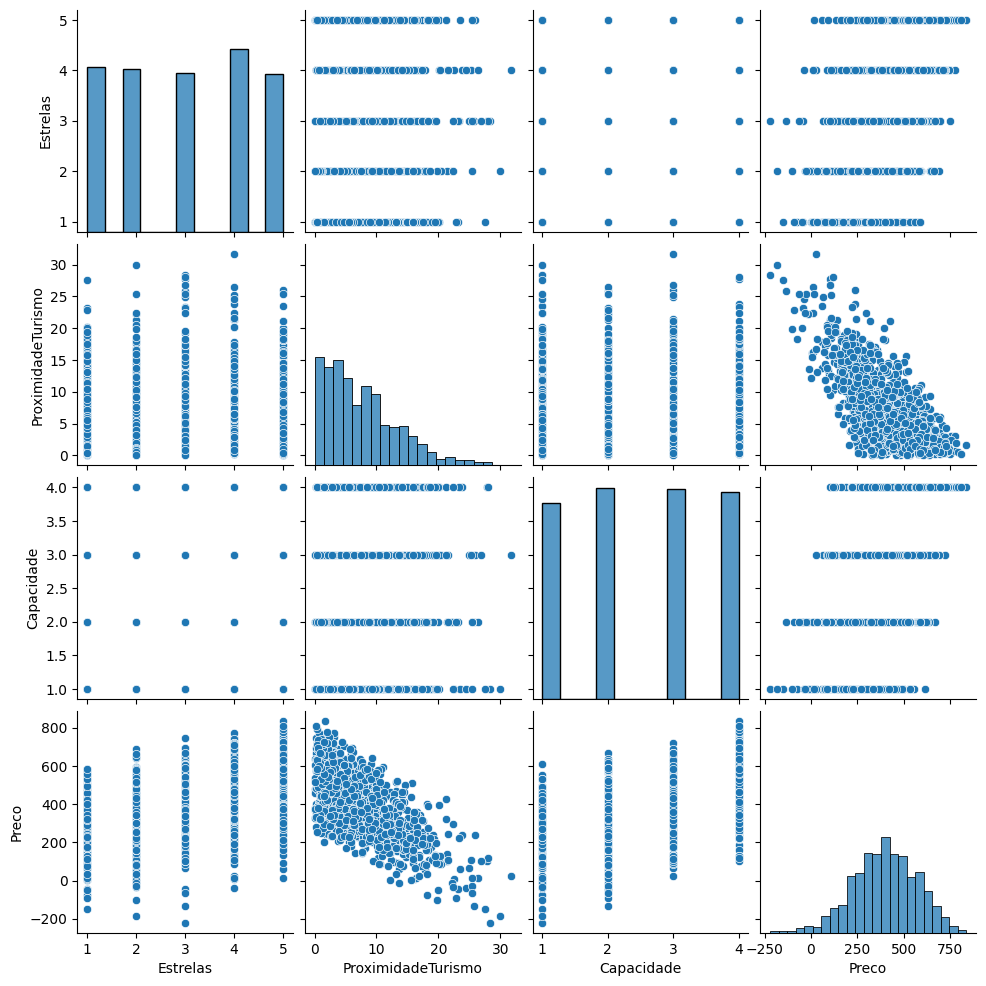

In [5]:
#1 - análise inicial com o PairPlot da Seaborn
sns.pairplot(dados)
plt.show()

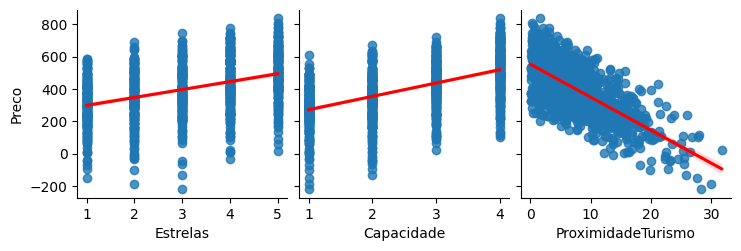

In [15]:
#2 - construir modelos de regressão linear

sns.pairplot(dados, y_vars = 'Preco', x_vars = ['Estrelas','Capacidade','ProximidadeTurismo'], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [17]:
#3 - realizar a comparação desses modelos.

# import train_test_split
from sklearn.model_selection import train_test_split

#definindo y e x
y = dados['Preco']
x = dados.drop(columns = 'Preco')

#aplicando o split do y e x
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state= 230)

#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['Preco'] = Y_train

In [18]:
#import ols
import statsmodels.api as sm

# adicionando o constante
X_train = sm.add_constant(X_train)
X_train.head()


,const,Estrelas,ProximidadeTurismo,Capacidade
740,1.0,5,9.724029,3
182,1.0,4,14.893560,4
39,1.0,4,2.524966,1
29,1.0,4,16.709430,2
221,1.0,2,0.229598,1


In [25]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_0 = sm.OLS(Y_train,
                  X_train[['const','Estrelas','ProximidadeTurismo','Capacidade']]).fit()

In [20]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','Estrelas','ProximidadeTurismo']]).fit()

In [22]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','Estrelas']]).fit()

In [26]:
# Resumo do modelo 0
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:17:15   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                195.1576      6

In [27]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     625.5
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          2.79e-156
Time:                        18:17:23   Log-Likelihood:                -4232.3
No. Observations:                 700   AIC:                             8471.
Df Residuals:                     697   BIC:                             8484.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                409.2894     10

In [28]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.27e-27
Time:                        18:17:30   Log-Likelihood:                -4533.1
No. Observations:                 700   AIC:                             9070.
Df Residuals:                     698   BIC:                             9079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        254.5755     14.302     17.800      0.0

In [29]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)

R²
Modelo 0:  0.9241850901112033
Modelo 1:  0.6421968356956186
Modelo 2:  0.15499226890449191


In [30]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))

4
3
2
